In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('..\\data\\checking-logs.sqlite.sqlite_copy')

In [4]:
commits = pd.io.sql.read_sql(
    "select date(timestamp) as date, cast(strftime('%H', timestamp) as integer) as hour from checker where uid like 'user_%'",
    conn, parse_dates=['date']
    )
commits

,date,hour
0,2020-04-17,5
1,2020-04-17,5
2,2020-04-17,5
3,2020-04-17,5
4,2020-04-17,5
...,...,...
3202,2020-05-21,20
3203,2020-05-21,20
3204,2020-05-21,20
3205,2020-05-21,20


## C помощью кат режим на времена суток

In [5]:
labels = ['night', 'morning', 'afternoon', 'evening']
commits['daytime'] = pd.cut(commits.hour, [0, 4, 10, 17, 24], labels=labels,
                          right=False, include_lowest=True)
# commits.drop('hour', inplace=True, axis=1)
commits

,date,hour,daytime
0,2020-04-17,5,morning
1,2020-04-17,5,morning
2,2020-04-17,5,morning
3,2020-04-17,5,morning
4,2020-04-17,5,morning
...,...,...,...
3202,2020-05-21,20,evening
3203,2020-05-21,20,evening
3204,2020-05-21,20,evening
3205,2020-05-21,20,evening


In [30]:
# commits
df = commits.groupby(['date', 'daytime']).count()
df.reset_index(inplace=True)
# df = df.unstack(1)
df_pivot = pd.pivot(df, values='hour',
                    index='date', columns='daytime')
# df = df.droplevel(0)
# commits.drop('hour', inplace=True, axis=1)
# df.reset_index('daytime', inplace=True)
df_pivot

daytime,night,morning,afternoon,evening
date,,,,
2020-04-17,NaN,13.0,10.0,NaN
2020-04-18,NaN,1.0,33.0,35.0
2020-04-19,2.0,4.0,16.0,11.0
2020-04-20,NaN,NaN,12.0,13.0
2020-04-21,NaN,NaN,NaN,25.0
2020-04-22,NaN,NaN,4.0,24.0
2020-04-23,2.0,6.0,15.0,20.0
2020-04-24,NaN,NaN,4.0,12.0
2020-04-25,1.0,21.0,33.0,49.0


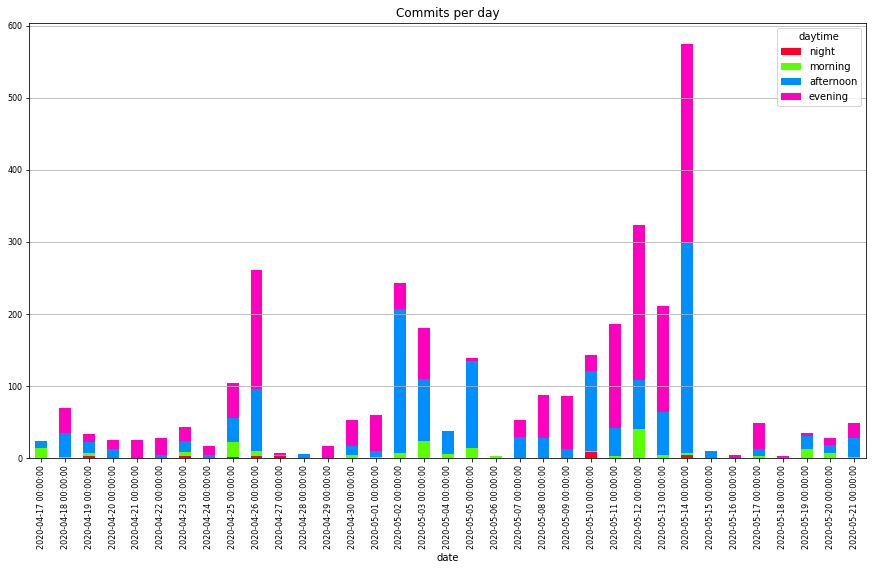

In [32]:
ax = df_pivot.plot.bar(stacked=True, figsize=(15, 8), title='Commits per day',
                 rot=90, fontsize=8, colormap='gist_rainbow')
ax.grid(axis='y')

In [36]:
df = df_pivot
df.sum()

daytime
night          21.0
morning       184.0
afternoon    1391.0
evening      1611.0
dtype: float64

## Самые частые периоды: afternoon, evening

In [37]:
df[df['evening'] > df['afternoon']].sum(axis=1).idxmax()

Timestamp('2020-05-12 00:00:00')

## День, в котором количество комментариев вечером было больше  чем днем, по отношению других дней: 2020-05-12

In [38]:
conn.close()